In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Algorithm import Kmeans, scaler, get_2D_graph

In [2]:
df = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\basic4.csv')

In [3]:
df.drop(['color'], axis=1, inplace=True)

In [4]:
df.head()

,x,y
0,144.475109,101.450265
1,370.683312,298.003415
2,253.714046,234.079402
3,148.699165,78.654006
4,192.157973,252.837304


In [5]:
df.describe()

,x,y
count,12529.000000,12529.000000
mean,252.730229,200.991861
std,94.368588,79.893046
min,57.876820,28.500580
25%,175.141025,136.093748
50%,256.816991,200.790004
75%,327.379037,263.893206
max,451.220370,375.904180


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12529 entries, 0 to 12528
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       12529 non-null  float64
 1   y       12529 non-null  float64
dtypes: float64(2)
memory usage: 195.9 KB


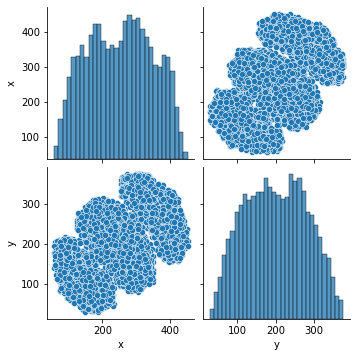

In [7]:
sns.pairplot(data=df)

In [8]:
df_scale = scaler(df)

In [9]:
kmeans = Kmeans(df_scale,3)

In [10]:
init_centers = kmeans.get_init_centers_simple_method()

In [11]:
labels, centers = kmeans.get_final_centers_simple_method(init_centers)

In [12]:
print(labels)

[2 0 1 ... 2 2 2]


In [13]:
print(centers)

              x         y
4686   0.765257  0.717729
7986   0.484265  0.515331
12036  0.240777  0.256814


In [14]:
df_check = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\basic4.csv')

In [15]:
df_check.head()

,x,y,color
0,144.475109,101.450265,0
1,370.683312,298.003415,2
2,253.714046,234.079402,1
3,148.699165,78.654006,0
4,192.157973,252.837304,1


<AxesSubplot:xlabel='x', ylabel='y'>

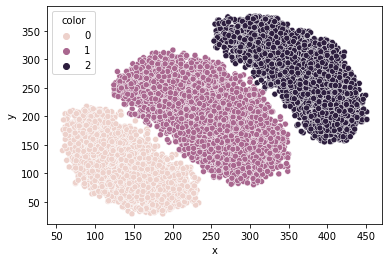

In [16]:
sns.scatterplot(data=df_check,x= 'x',y= 'y', hue='color')

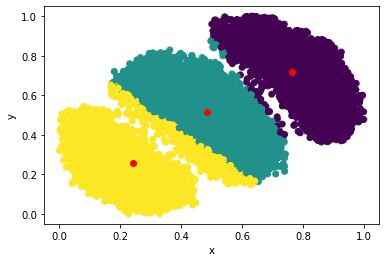

In [17]:
get_2D_graph(df_scale, centers,labels,x_name='x',y_name='y')

In [18]:
df_scale['Cluster'] = labels

In [19]:
df_scale['Cluster'].value_counts()

1    4489
2    4042
0    3998
Name: Cluster, dtype: int64

In [20]:
# df_scale['Cluster'] = df_scale['Cluster'].apply(lambda x: ('Iris-setosa' if x==0
#                              else 'Iris-virginica' if x==1
#                              else 'Iris-versicolor'))

In [21]:
df_scale

,x,y,Cluster
0,0.220159,0.209985,2
1,0.795250,0.775763,0
2,0.497878,0.591758,1
3,0.230898,0.144366,2
4,0.341384,0.645752,1
...,...,...,...
12524,0.213784,0.605816,2
12525,0.264542,0.113620,2
12526,0.164169,0.188924,2
12527,0.317801,0.246412,2


In [22]:
df_scale['Species'] = df_check['Species']

KeyError: 'Species'

In [ ]:
df_scale

In [ ]:
conditions = [df_scale['Cluster'] == df_scale['Species'], 
              df_scale['Cluster'] != df_scale['Species']]

choices = [int(1), int(0)]

df_scale['check'] = np.select(conditions, choices, default=1)

In [ ]:
df_scale[df_scale['check']==1]['check'].sum()/len(df_scale.index)